# Simulation from bifurcation diagram, different scale ($\beta_1/\beta_2$) options
Type II, $x_{max} = 5$, $A = 0.4$, $\alpha_2(x) = 0.95$ constant, $\eta_1 = 0.2, \eta_2 = 0.5$, $T_x = 0.01$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
final_fig_path = "../../CH_Manuscript/Figures/"
import sys
sys.path.insert(1, '../Functions')

import group_w_pop_funs as grp
import equilibria_funs as eq
import sim_graph_funs as sim
from sim_graph_funs import N1lab, N2lab, Plab, mean_x_lab, Tlab
import bif_diagram_funs as bif
from local_stability_funs import fun_Jac, classify_stability
bif_sim_fig_path = final_fig_path + "/BifurcationSimulations/"

In [5]:
H=1
x_max = 5
params_base = dict(η1 = 0.2, η2 = 0.5, A = 0.5, β1 = 8, β2 = 1, H1=H, H2=H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = 10,
                 Tx = .01, pop_process = True)

fn_lab_list = ['meanx', 'preys', 'g2', 'g3']

# Type II, Scale = 4

In [4]:
params = sim.update_params("scale", 4, params_base)
initial_points = sim.get_initial_points(3,**params)
initialstate = [.3,.7,*eq.initiate_g_first_x(3,params["x_max"])]
initial_points = np.vstack((initial_points,initialstate))

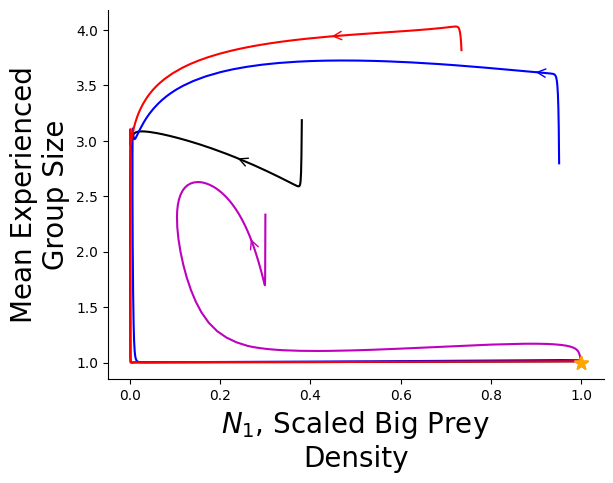

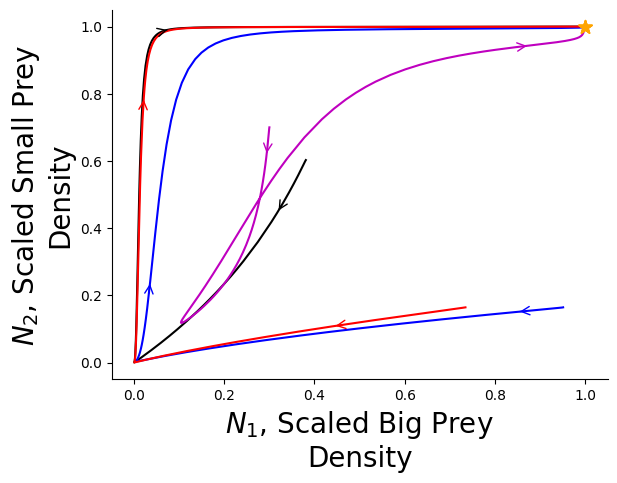

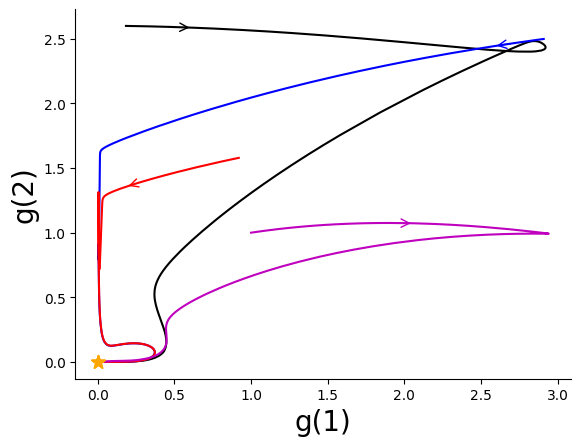

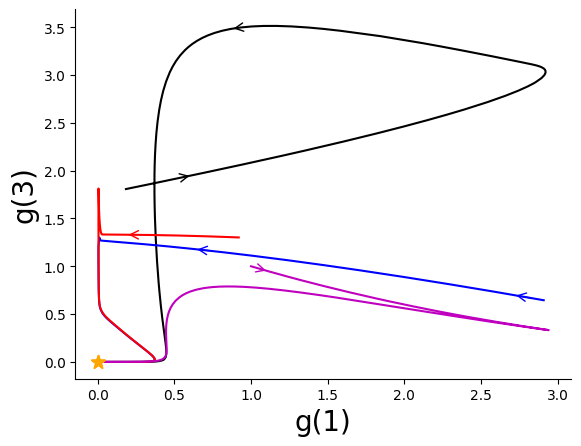

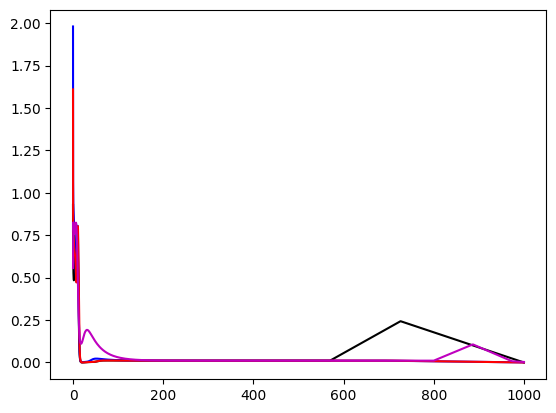

In [7]:
start_inds = [[70,50,50,80],
              [[65,170],[55,160],[50,170],[70,150]],
              [10,3,10,30],
              [[10,80],[2,20],10,15]]

fig1, figN, fig_g2, fig_g3, fig_var = sim.make_traj_plots(
    params, t_f =1000, start_inds = start_inds, grp_size2 = 3,
initial_points = initial_points
)

In [13]:
figlist = [fig1, figN, fig_g2, fig_g3]
fn_base = "_type2_scale_4.eps"
for fig,fn in zip(figlist, fn_lab_list):
    fig.savefig(bif_sim_fig_path + fn + fn_base, **sim.figure_ops)

# Type 2, Scale = 8

In [14]:
params_base['H2'] = 1
params = bif.update_params("scale", 8, params_base)


In [15]:
out = eq.get_equilibrium(params, N1_0 = 0.7, N2_0 = 0.7, g_of_x_vec = [1,1,1,0,0])
equilibrium = out.x
print(equilibrium)


perturbed_pt = [0.7, 0.7, 1,1,1,1e-4,1e-4]
initial_points = bif.get_initial_points(3,**params)
initial_points = np.vstack((initial_points,perturbed_pt))

[0.6340475  0.72130594 0.23320018 0.15116554 0.20782921 0.08853843
 0.01187339]


In [25]:
initial_points

array([[3.80794718e-01, 6.02671899e-01, 1.83670000e-01, 2.59986668e+00,
        1.80733389e+00, 2.12713701e+00, 7.15476379e-02],
       [9.51207163e-01, 1.64458454e-01, 2.91003046e+00, 2.49900350e+00,
        6.44893941e-01, 5.53656652e-01, 5.58379484e-01],
       [7.34674002e-01, 1.64434575e-01, 9.19684306e-01, 1.57902173e+00,
        1.30151561e+00, 8.80775129e-01, 1.83944016e+00],
       [7.00000000e-01, 7.00000000e-01, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e-04, 1.00000000e-04]])

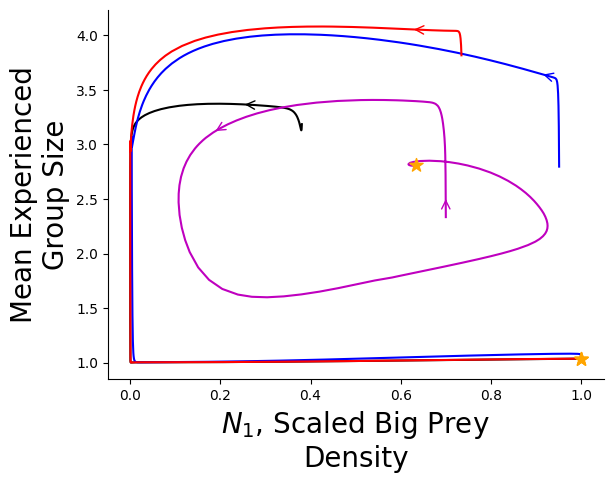

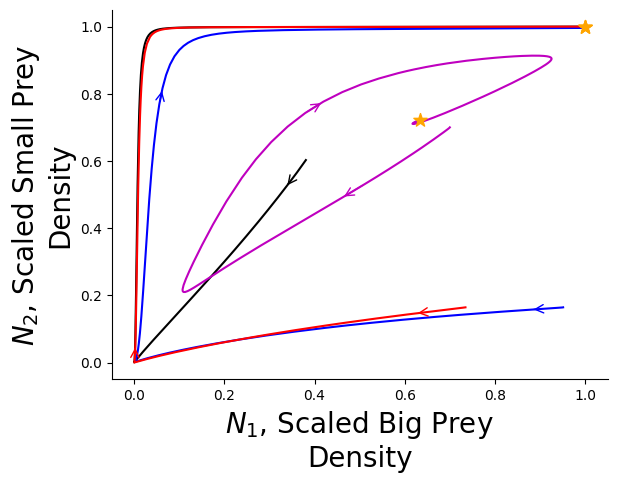

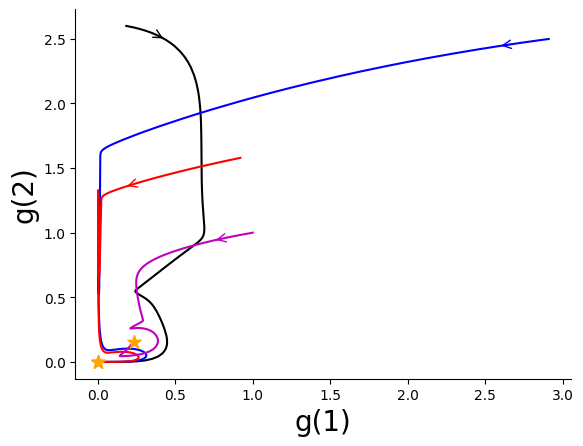

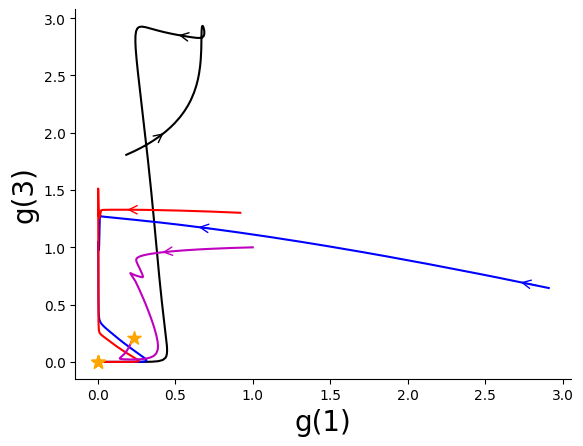

In [33]:
start_inds = [[80,50,50,[40,120]],
              [65,[55,180],[50,170],[110,150]],
              [10,3,10,40],
              [[10,80],[2,20],10,50]]

fig1, figN, fig_g2, fig_g3, _ = sim.make_traj_plots(params, t_f =1000, 
                                        start_inds = start_inds, grp_size2 = 3, 
                                        initial_points=initial_points)

In [34]:
figlist = [fig1, figN, fig_g2, fig_g3]
fn_base = "_type2_scale_8.eps"
for fig,fn in zip(figlist, fn_lab_list):
    fig.savefig(bif_sim_fig_path + fn + fn_base, **sim.figure_ops)

# Type 2, Scale = 12

In [43]:
params_base['H2'] = 1
params = bif.update_params("scale", 12, params_base)
start_inds = [[80,50,50,[40,120]],
              [65,55,50,[110,150]],
              [10,3,10,40],
              [[10,100],2,10,50]]

In [37]:
out = eq.get_equilibrium(params, N1_0 = 0.7, N2_0 = 0.7, g_of_x_vec = np.array([1,1,1,0,0]))
equilibrium = out.x
print(equilibrium)


perturbed_pt = [0.7, 0.7, 1,1,1,1e-4,1e-4]
initial_points = bif.get_initial_points(3,**params)
initial_points = np.vstack((initial_points,perturbed_pt))

[0.42623566 0.64350447 0.20980322 0.17220604 0.30961987 0.17497661
 0.03116667]


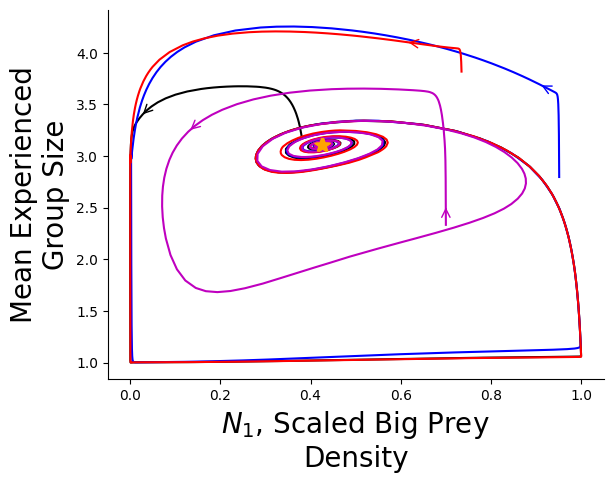

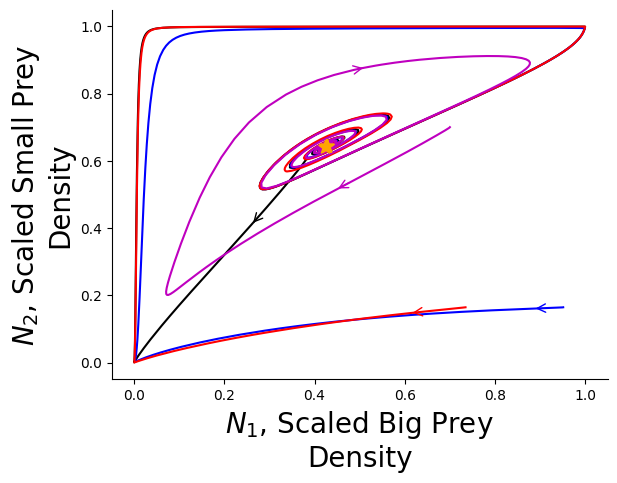

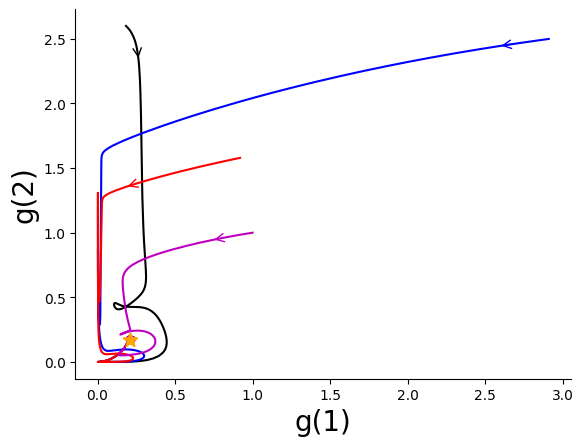

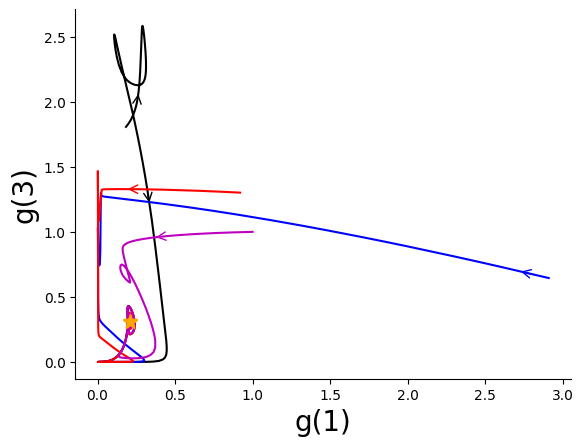

In [44]:
fig1, figN, fig_g2, fig_g3, _ = sim.make_traj_plots(params, t_f =1000, 
                                        start_inds = start_inds, grp_size2 = 3, 
                                        initial_points=initial_points)

In [45]:
figlist = [fig1, figN, fig_g2, fig_g3]
fn_base = "_type2_scale_12.eps"
for fig,fn in zip(figlist, fn_lab_list):
    fig.savefig(bif_sim_fig_path + fn + fn_base, **sim.figure_ops)

In [48]:
trajectories = get_traj_plot_input(params, t_f = 1000, initial_points = initial_points)
# each trajectory in form T, N1, N2, P, g_of_x_vec, mean_x

# Type 2, Large Big Prey Growth Rate ($\eta_1 = 0.4$)
where $\beta_1/\beta_2 = H_1/H_2 = 8$


In [6]:
params_base['H2'] = 1
params = bif.update_params("scale", 8, params_base)
params['η1']= 0.4
start_inds = [[80,50,50,40],
              [65,55,50,[110,150]],
              [10,3,10,40],
              [10,2,10,50]]

In [7]:
perturbed_pt = [0.7, 0.7, 1,1,1,1e-4,1e-4]
initial_points = bif.get_initial_points(3,**params)
initial_points = np.vstack((initial_points,perturbed_pt))

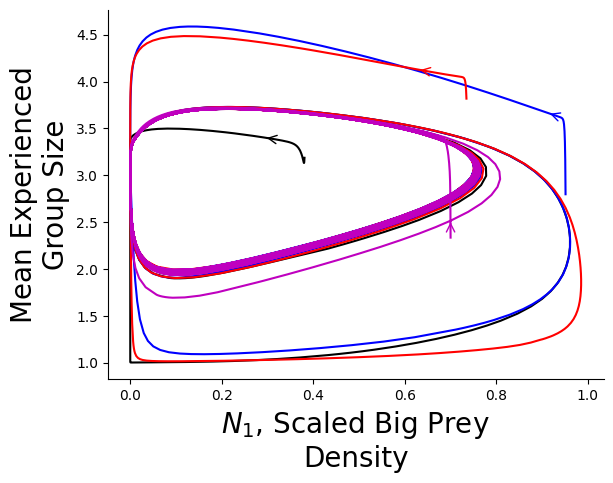

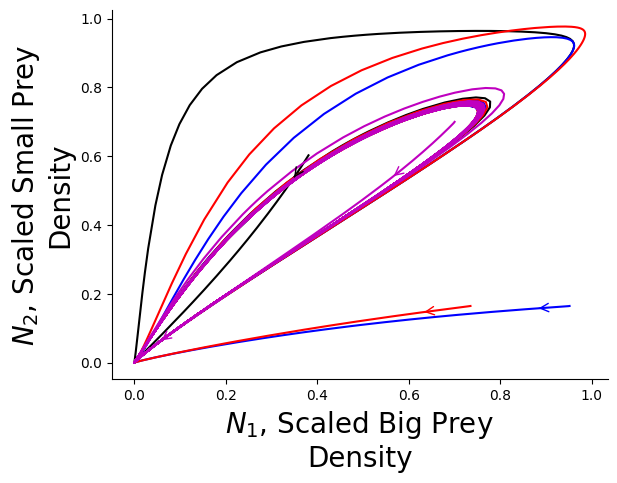

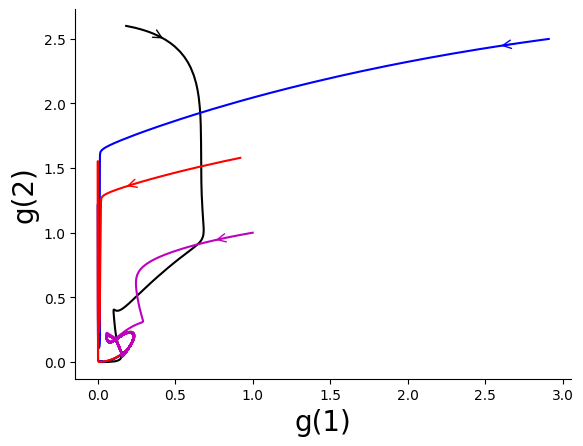

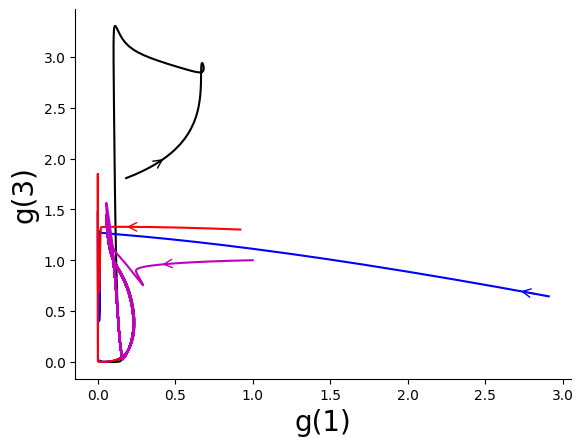

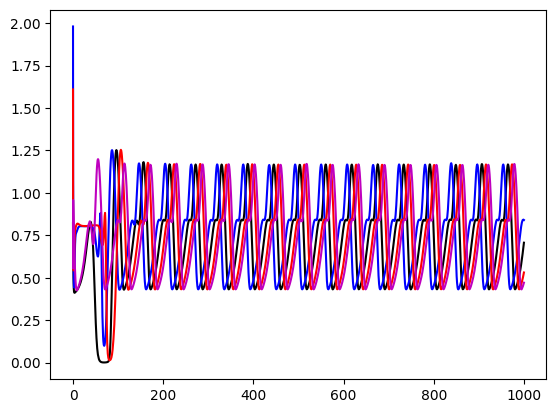

In [41]:
fig1, figN, fig_g2, fig_g3, _ = sim.make_traj_plots(params, t_f =1000, 
                                        start_inds = start_inds, grp_size2 = 3, 
                                        initial_points=initial_points)

In [42]:
figlist = [fig1, figN, fig_g2, fig_g3]
fn_base = "_type2_eta1_4.eps"
for fig,fn in zip(figlist, fn_lab_list):
    fig.savefig(bif_sim_fig_path + fn + fn_base, **sim.figure_ops)

In [14]:
out = sim.get_traj_plot_input(params, t_f = 1000, initial_points = initial_points)


NameError: name 'lat_traj' is not defined

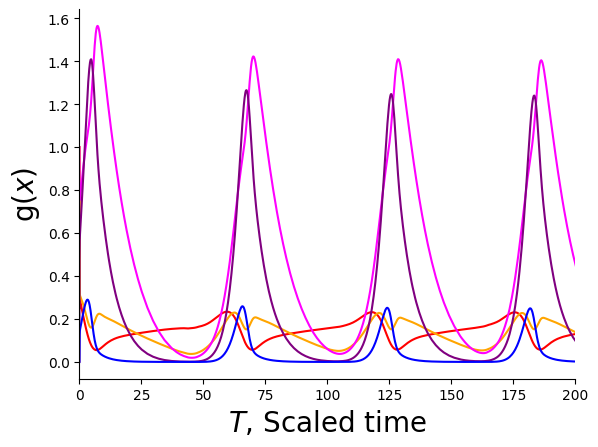

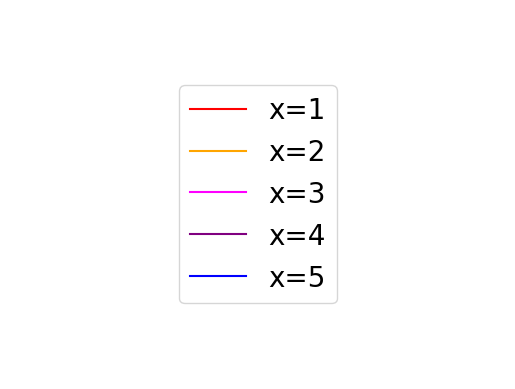

In [37]:
last_traj = out[-1]
T = last_traj['T']
gmat = last_traj['g']
for x in range(1,6):
    plt.plot(T,gmat[x-1], c=sim.colors[x-1], label = f'x={x}')

fig_g = plt.gcf()
ax1 = plt.gca()
sim.format_ax(ax = ax1, xlab = sim.Tlab, ylab = sim.gxlab, xlim = [0,200], if_legend = True)

# get legend object
legend_obj = ax1.get_legend()
# Extract handles and labels correctly
handles = legend_obj.get_lines()  # Correct way to get legend handles
labels = [text.get_text() for text in legend_obj.get_texts()]  # Get legend text



# Remove legend from fig1
legend_obj.remove()

# put legend in separate figure
figlegend, axlegend = plt.subplots()
axlegend.axis('off') 
axlegend.legend(handles, labels, loc="center", fontsize = 20)




In [39]:
fn_base = "_type2_eta1_4.eps"
fig_g.savefig(bif_sim_fig_path + 'gx_vs_T' + fn_base, 
              **sim.figure_ops)

In [40]:
figlegend.savefig(bif_sim_fig_path + 'gx_legend' + fn_base, 
                  **sim.figure_ops)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
